# <p style="text-align:center;"><ins>Telecom Churn Case Study</ins></p>

## Problem Statement


In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist, your task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.

## Objectives

The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

Recommend strategies to manage customer churn based on your observations.

Note that it's highly likely that you'll need to build multiple models to fulfil the objectives mentioned in Points 1 and 2. Since here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

In [1]:
# Importing the important libraries 

import warnings  
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score,StratifiedKFold,GridSearchCV

#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
# Reading the dataset into df and test Dataframes
df = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [3]:
#shape of the dataset
df.shape

(69999, 172)

In [4]:
#Statistical description of data
df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

>The main objective is to identify the churn of High value customers. So, Assuming the High value customers are those whose average ARPU is 70 percentile and above.

In [5]:
#creating a new variable "avg_arpu" that is the average value of (arpu_6 + arpu_7) together 
#arpu_8 is not included because it the action phase where customer decides to churn, so we have to identify it before.
df['avg_arpu'] = (df['arpu_6'].fillna(0) + df['arpu_7'].fillna(0))/2

#checking the average arpu at 70th percentile
df['avg_arpu'].quantile(0.7)

317.491

In [6]:
#selecting the samples that have average arpu of 70 percentile and above
df = df[df['avg_arpu'] > df['avg_arpu'].quantile(0.7)]

#shape of the data after filtering only the high value customers
df.shape

(21000, 173)

In [7]:
df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
12  12        109             0.0             0.0             0.0   
15  15        109             0.0             0.0             0.0   
23  23        109             0.0             0.0             0.0   
24  24        109             0.0             0.0             0.0   
25  25        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
12            6/30/2014            7/31/2014            8/31/2014   439.919   
15            6/30/2014            7/31/2014            8/31/2014   580.549   
23            6/30/2014            7/31/2014            8/31/2014  1130.948   
24            6/30/2014            7/31/2014            8/31/2014   371.974   
25            6/30/2014            7/31/2014            8/31/2014   362.951   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
12  397.946  392.024       244.46       108.31        42.98        571.98   
15  377.294  338.286        10.43        24.99       194.43        317.11   
23  905.506  479.762       859.53       372.71         0.89        293.46   
24  352.069  240.449        93.18        38.29        29.86        531.19   
25  321.763  689.603       193.71       124.53       197.54        423.21   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
12        727.91        644.43            0.0            0.0            0.0   
15        341.79        197.09            0.0            0.0            0.0   
23        450.11        386.91            0.0            0.0            0.0   
24        507.76        222.03            0.0            0.0            0.0   
25        184.88        556.61            0.0            0.0            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
12            0.0            0.0            0.0              0.00   
15            0.0            0.0            0.0             10.43   
23            0.0            0.0            0.0            859.53   
24            0.0            0.0            0.0             93.18   
25            0.0            0.0            0.0             49.81   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
12              7.86              3.98             44.01             13.93   
15             24.99            194.43            313.76            330.88   
23            372.71              0.89             79.79            424.63   
24             38.29             29.86            159.29            219.44   
25             75.01             81.86            164.39            115.48   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
12             51.24              0.00              0.00              0.00   
15            185.88              3.26             10.91              4.94   
23            378.01             11.58             25.43              8.88   
24             99.86              0.00              0.00              0.00   
25            229.68              3.31              0.00              0.36   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
12               0.0               0.0              0.00         44.01   
15               0.0               0.0              0.00        327.46   
23               0.0               0.0              0.00        950.91   
24               0.0               0.0              0.36        252.48   
25               0.0               0.0              7.01        217.53   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
12         21.79         55.23            244.46            100.44   
15        366.79        385.26              0.00              0.00   
23        822.78        387.79              0.00              0.00   
24        257.74        129.73              0.00              0.00   
25        190.49        311.

>Let us now check for null values present in the data

In [8]:
#filtering the variables that have greater than 50% null values and dropping them
missing = 100*df.isna().mean()
missing = missing[missing>50]
missing

date_of_last_rech_data_6    61.890476
date_of_last_rech_data_7    61.071429
date_of_last_rech_data_8    60.680952
total_rech_data_6           61.890476
total_rech_data_7           61.071429
total_rech_data_8           60.680952
max_rech_data_6             61.890476
max_rech_data_7             61.071429
max_rech_data_8             60.680952
count_rech_2g_6             61.890476
count_rech_2g_7             61.071429
count_rech_2g_8             60.680952
count_rech_3g_6             61.890476
count_rech_3g_7             61.071429
count_rech_3g_8             60.680952
av_rech_amt_data_6          61.890476
av_rech_amt_data_7          61.071429
av_rech_amt_data_8          60.680952
arpu_3g_6                   61.890476
arpu_3g_7                   61.071429
arpu_3g_8                   60.680952
arpu_2g_6                   61.890476
arpu_2g_7                   61.071429
arpu_2g_8                   60.680952
night_pck_user_6            61.890476
night_pck_user_7            61.071429
night_pck_us

>These are the variables where more than 50% of the values are missing. Replacing such variables with mean or median increases noise in the data, Hence removing these variables

In [9]:
#dropping the variables that have Null values > 50%
df = df.drop(missing.index,axis=1)
df.shape

(21000, 143)

>lets check for the variables where all the values are same which has no variance and doesn't help us in modelling

In [10]:
#checking for the variables that have no variance
#These can be found by checking if number of unique observations in the data are just 1
no_variance = [col for col in df.columns if df[col].nunique() == 1]
no_variance

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [11]:
#dropping the variables that have no_variance
df = df.drop(no_variance,axis=1)

#looking for object data types in the data 
object_dtype = df.select_dtypes(include='object')
print(object_dtype.columns)

#dropping the last date of recharge columns as they don't add any value to the model 
#These columns just provide the date of last recharge
df = df.drop(object_dtype,axis=1)

# Id column is not useful for model, avg_arpu has been created for selecting high value customers.
# avg_arpu will be highly correlated with arpu_6,arpu_7,arpu_8 . Hence dropping both these variables.
df2 = df.drop(['id','avg_arpu'],axis=1)
print(df2.shape)

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')
(21000, 125)


In [12]:
# Imouting the null values in the data using the mean
for col in df2.columns:
    df2[col] = df2[col].fillna(df2[col].mean())
#All the null values in the data are imputed by the mean in their respective features.    

### Analysis of variables for multicollinearity

In [13]:
#Looking at the correlation of the features in the data.
corr = df2.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7              arpu_6              0.653428
arpu_8              arpu_7              0.766345
onnet_mou_7         onnet_mou_6         0.719713
onnet_mou_8         onnet_mou_6         0.601722
                    onnet_mou_7         0.792907
offnet_mou_7        offnet_mou_6        0.695790
offnet_mou_8        offnet_mou_7        0.738384
roam_ic_mou_8       roam_ic_mou_7       0.628236
roam_og_mou_6       roam_ic_mou_6       0.638208
roam_og_mou_8       roam_og_mou_7       0.616738
loc_og_t2t_mou_7    loc_og_t2t_mou_6    0.796908
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.724411
                    loc_og_t2t_mou_7    0.832067
loc_og_t2m_mou_7    loc_og_t2m_mou_6    0.769985
loc_og_t2m_mou_8    loc_og_t2m_mou_6    0.671833
                    loc_og_t2m_mou_7    0.805077
loc_og_t2f_mou_7    loc_og_t2f_mou_6    0.807037
loc_og_t2f_mou_8    loc_og_t2f_mou_6    0.745645
                    loc_og_t2f_mou_7    0.810077
loc_og_mou_6        loc_og_t2t_mou_6    0.759359
                    

>There is a huge correlation in the data, As most of the variables are KPI for 6,7,8 months of the customer

## Feature Engineering to remove multicollinearity and dimensionality reduction

#### 1. Instead of taking the raw KPI data, let us take the difference between the KPI of (6-7) month and (7-8) month.
We assume that in telecom sector the churn can be predicted by customer behavioural differences between months, Hence capturing the month-wise difference between KPI's yields better results than raw-data

#### 2. In this way as we take the difference, we are not only able to remove multi-collinearity but also reduce the number of features required.
Since differences won't be same, multi-collinearity will be removed, For every KPI variable, 2 new difference features are created in-place of 3 raw KPI, Hence the dimensionality will also be reduced by 33%

In [14]:
#In this step we create a new data_frame based upon the KPI of 6,7,8 variables and store the difference values

#Creating the lists of KPI for respecive months so that their difference can be calculated
kpi_6 = [ col for col in df2.columns if '6' in col]
kpi_7 = [ col for col in df2.columns if '7' in col]
kpi_8 = [ col for col in df2.columns if '8' in col]

#A new dataframe df_kpi is created that store the difference values of KPI(6-7) and KPI(7-8)
df_kpi = pd.DataFrame()
for i in range(0,len(kpi_6)-1):
    df_kpi["diff_"+kpi_6[i][:-2]+"(6-7)"] = df2[kpi_6[i]] - df2[kpi_7[i]] 
    df_kpi["diff_"+kpi_6[i][:-2]+"(7-8)"] = df2[kpi_7[i]] - df2[kpi_8[i]]

#Entering the differnce of vbc variable for 6,7,8 months    
df_kpi["vbc(6-7)"] = df2['jun_vbc_3g'] - df2['jul_vbc_3g']
df_kpi["vbc(7-8)"] = df2['jul_vbc_3g'] - df2['aug_vbc_3g']

#vbc_list that contains all the vbc_6,7,8 features
vbc_list = ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']

#drop_var that contains the variables to drop
drop_var = kpi_6+kpi_7+kpi_8+vbc_list

#dropping the variables from the df2 dataframe and store into df3
df3 = df2.drop(drop_var,axis=1)    

#create a new dataframe by concatenating the df_kpi and the df3
df_diff = pd.concat([df3,df_kpi],axis=1)
9
#printing the shape of the new dataframe df_diff
print(df_diff.shape)

(21000, 82)


In [15]:
#checking the features that are highly correlated even after the differences dataframe is created 
corr = df_diff.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

diff_loc_og_mou(6-7)      diff_loc_og_t2t_mou(6-7)    0.730343
                          diff_loc_og_t2m_mou(6-7)    0.762760
diff_loc_og_mou(7-8)      diff_loc_og_t2t_mou(7-8)    0.738629
                          diff_loc_og_t2m_mou(7-8)    0.748805
diff_std_og_t2t_mou(6-7)  diff_onnet_mou(6-7)         0.888869
diff_std_og_t2t_mou(7-8)  diff_onnet_mou(7-8)         0.874643
diff_std_og_t2m_mou(6-7)  diff_offnet_mou(6-7)        0.878321
diff_std_og_t2m_mou(7-8)  diff_offnet_mou(7-8)        0.890641
diff_std_og_mou(6-7)      diff_onnet_mou(6-7)         0.674919
                          diff_offnet_mou(6-7)        0.669126
                          diff_std_og_t2t_mou(6-7)    0.752559
                          diff_std_og_t2m_mou(6-7)    0.746716
diff_std_og_mou(7-8)      diff_onnet_mou(7-8)         0.621402
                          diff_offnet_mou(7-8)        0.691112
                          diff_std_og_t2t_mou(7-8)    0.705055
                          diff_std_og_t2m_mou(7-8)    0

In [16]:
# There are many redundant variables that explain the sum or total of other variables
# These redundant variables are not important as they are already explained by other variables
# Hence they are dropped from data 

redundant_vars = ['diff_loc_og_mou(6-7)','diff_loc_og_mou(7-8)','diff_std_og_t2t_mou(6-7)','diff_std_og_t2t_mou(7-8)',
                  'diff_std_og_t2m_mou(6-7)','diff_std_og_t2m_mou(7-8)','diff_std_og_mou(6-7)','diff_std_og_mou(7-8)',
                  'diff_total_og_mou(6-7)','diff_total_og_mou(7-8)','diff_loc_ic_mou(6-7)','diff_loc_ic_mou(7-8)',
                  'diff_std_ic_mou(6-7)','diff_std_ic_mou(7-8)','diff_total_ic_mou(6-7)','diff_total_ic_mou(7-8)',
                  'diff_total_rech_amt(6-7)','diff_total_rech_amt(7-8)']

# Droping the redundant_vars from the dataset and printing the shape
df_diff = df_diff.drop(redundant_vars,axis=1)
print("New shape after dropping the redundant_vars",df_diff.shape)

# Since we dropped the redundant variables, let us again check for multicollinearity
corr = df_diff.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

New shape after dropping the redundant_vars (21000, 64)


Series([], dtype: float64)

### With this feature engineering technique, we were able to achieve two important results
#### 1.Removed multicollinearity (As seen in high_corr_value above & heatmap below)
#### 2.Reduced the dimensionality (number of features from 125 to 64)

In [17]:
#Let us separate the target variable from the dataset to further proceed with feature engineering
target = df_diff['churn_probability']
df_diff = df_diff.drop('churn_probability',axis=1)

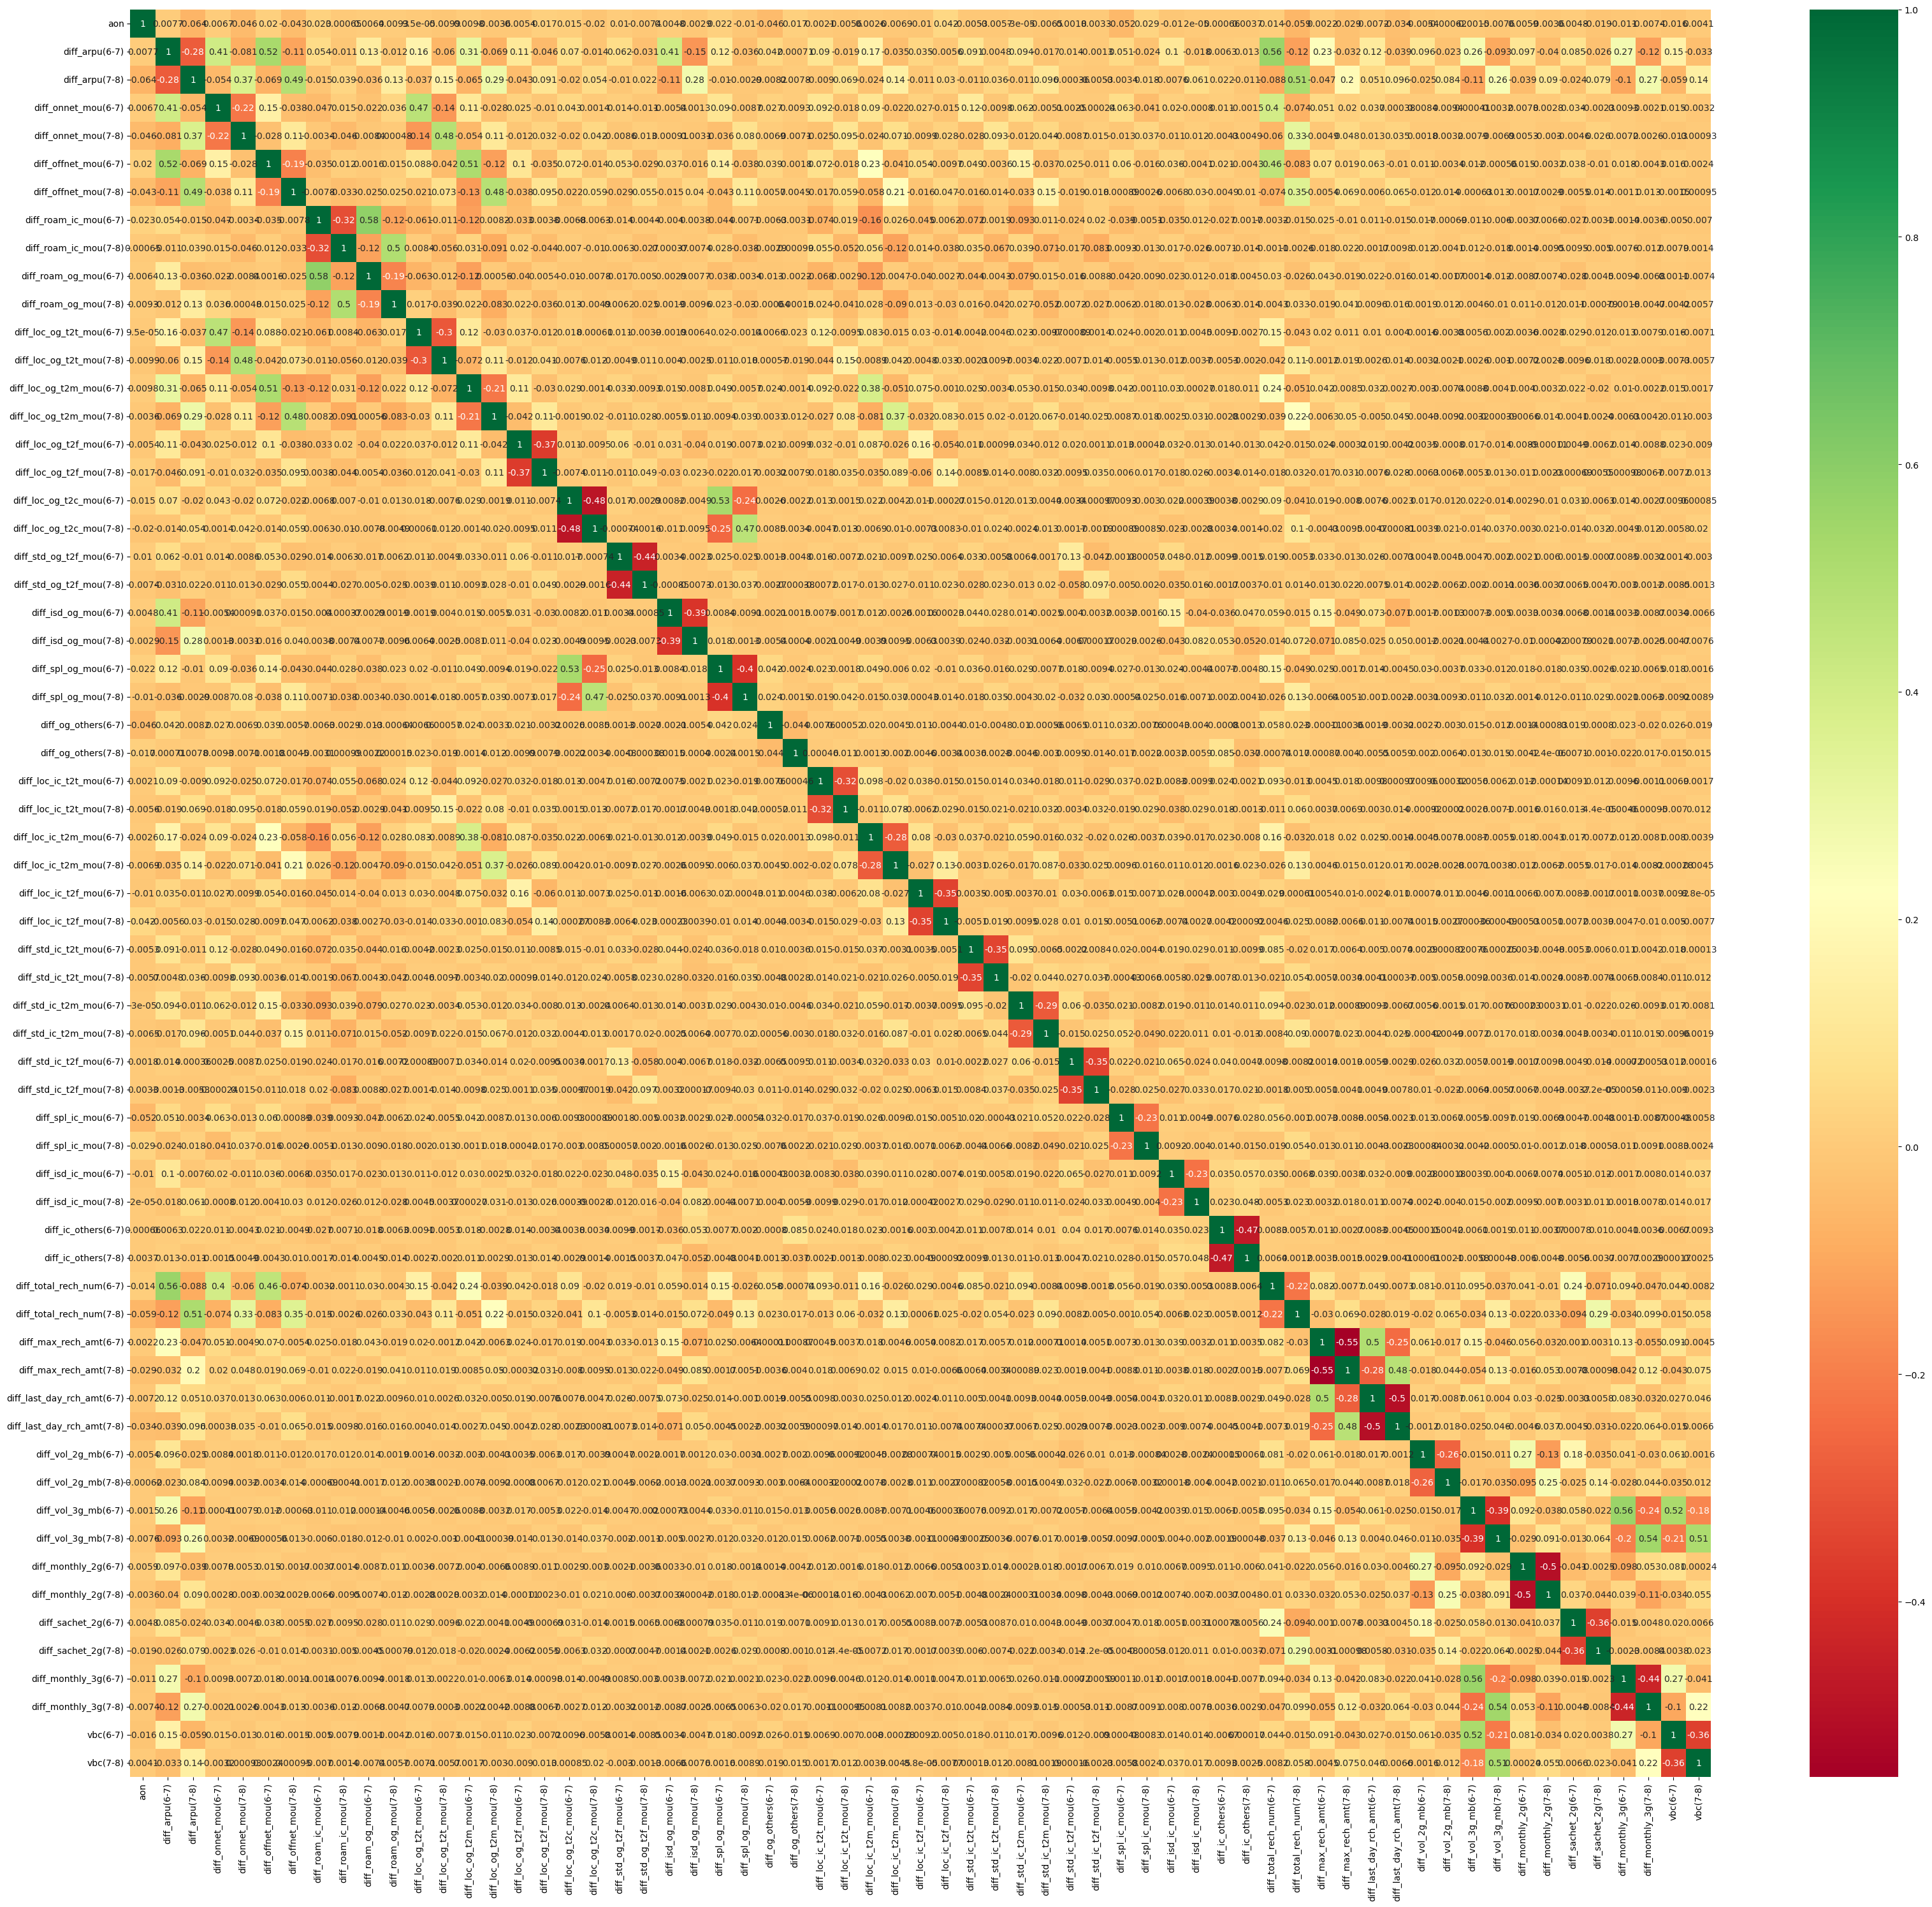

In [18]:
# Plotting a heatmap of all the variables to see the correlation
plt.figure(figsize=(40,36))
sns.heatmap(df_diff.corr(),annot=True,cmap='RdYlGn')
plt.show()

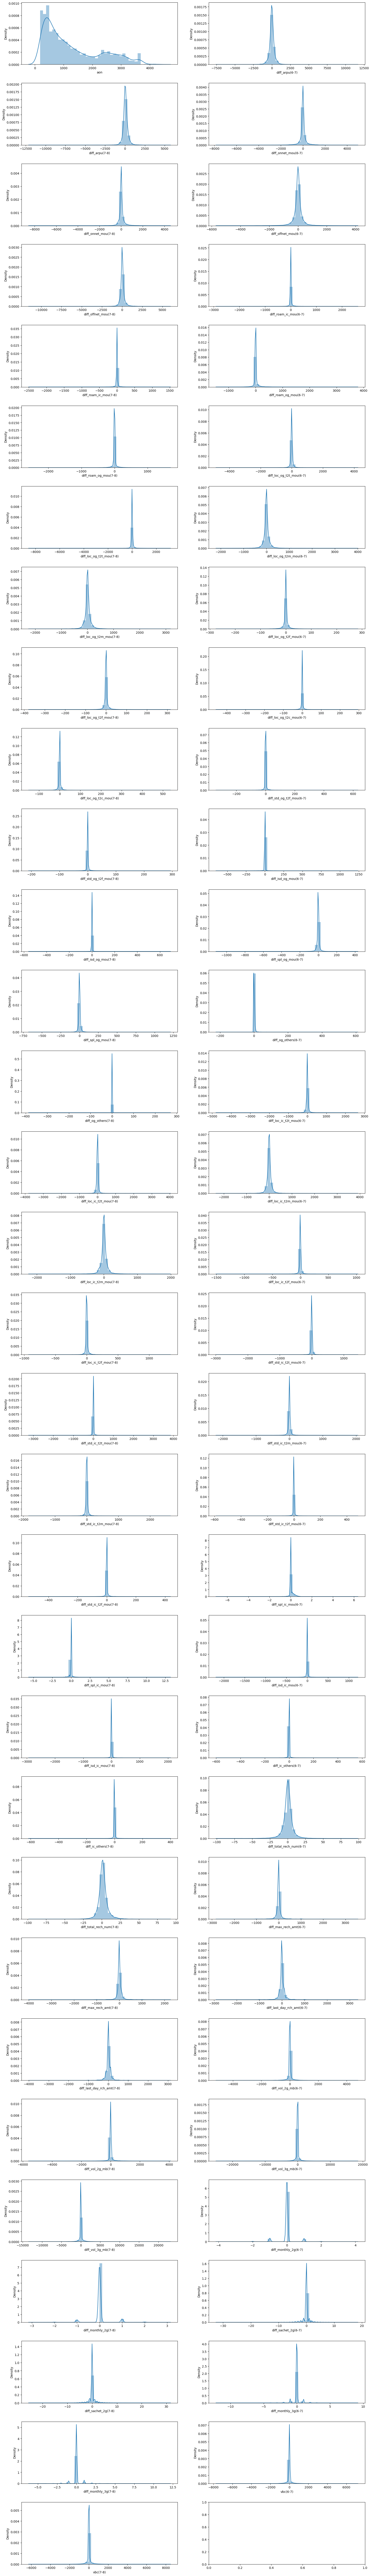

In [19]:
# Ploting distplots for all the variables to check for the distribution of data
fig, axes = plt.subplots(32, 2, figsize=(20, 150))

for index, col in enumerate(df_diff.columns):
    i, j = divmod(index, 2)
    sns.distplot(df_diff[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

>From the histograms above we can see that there are a lot of variables that have skewed distribution and presence of outliers.

## Outlier Detection and Treatment

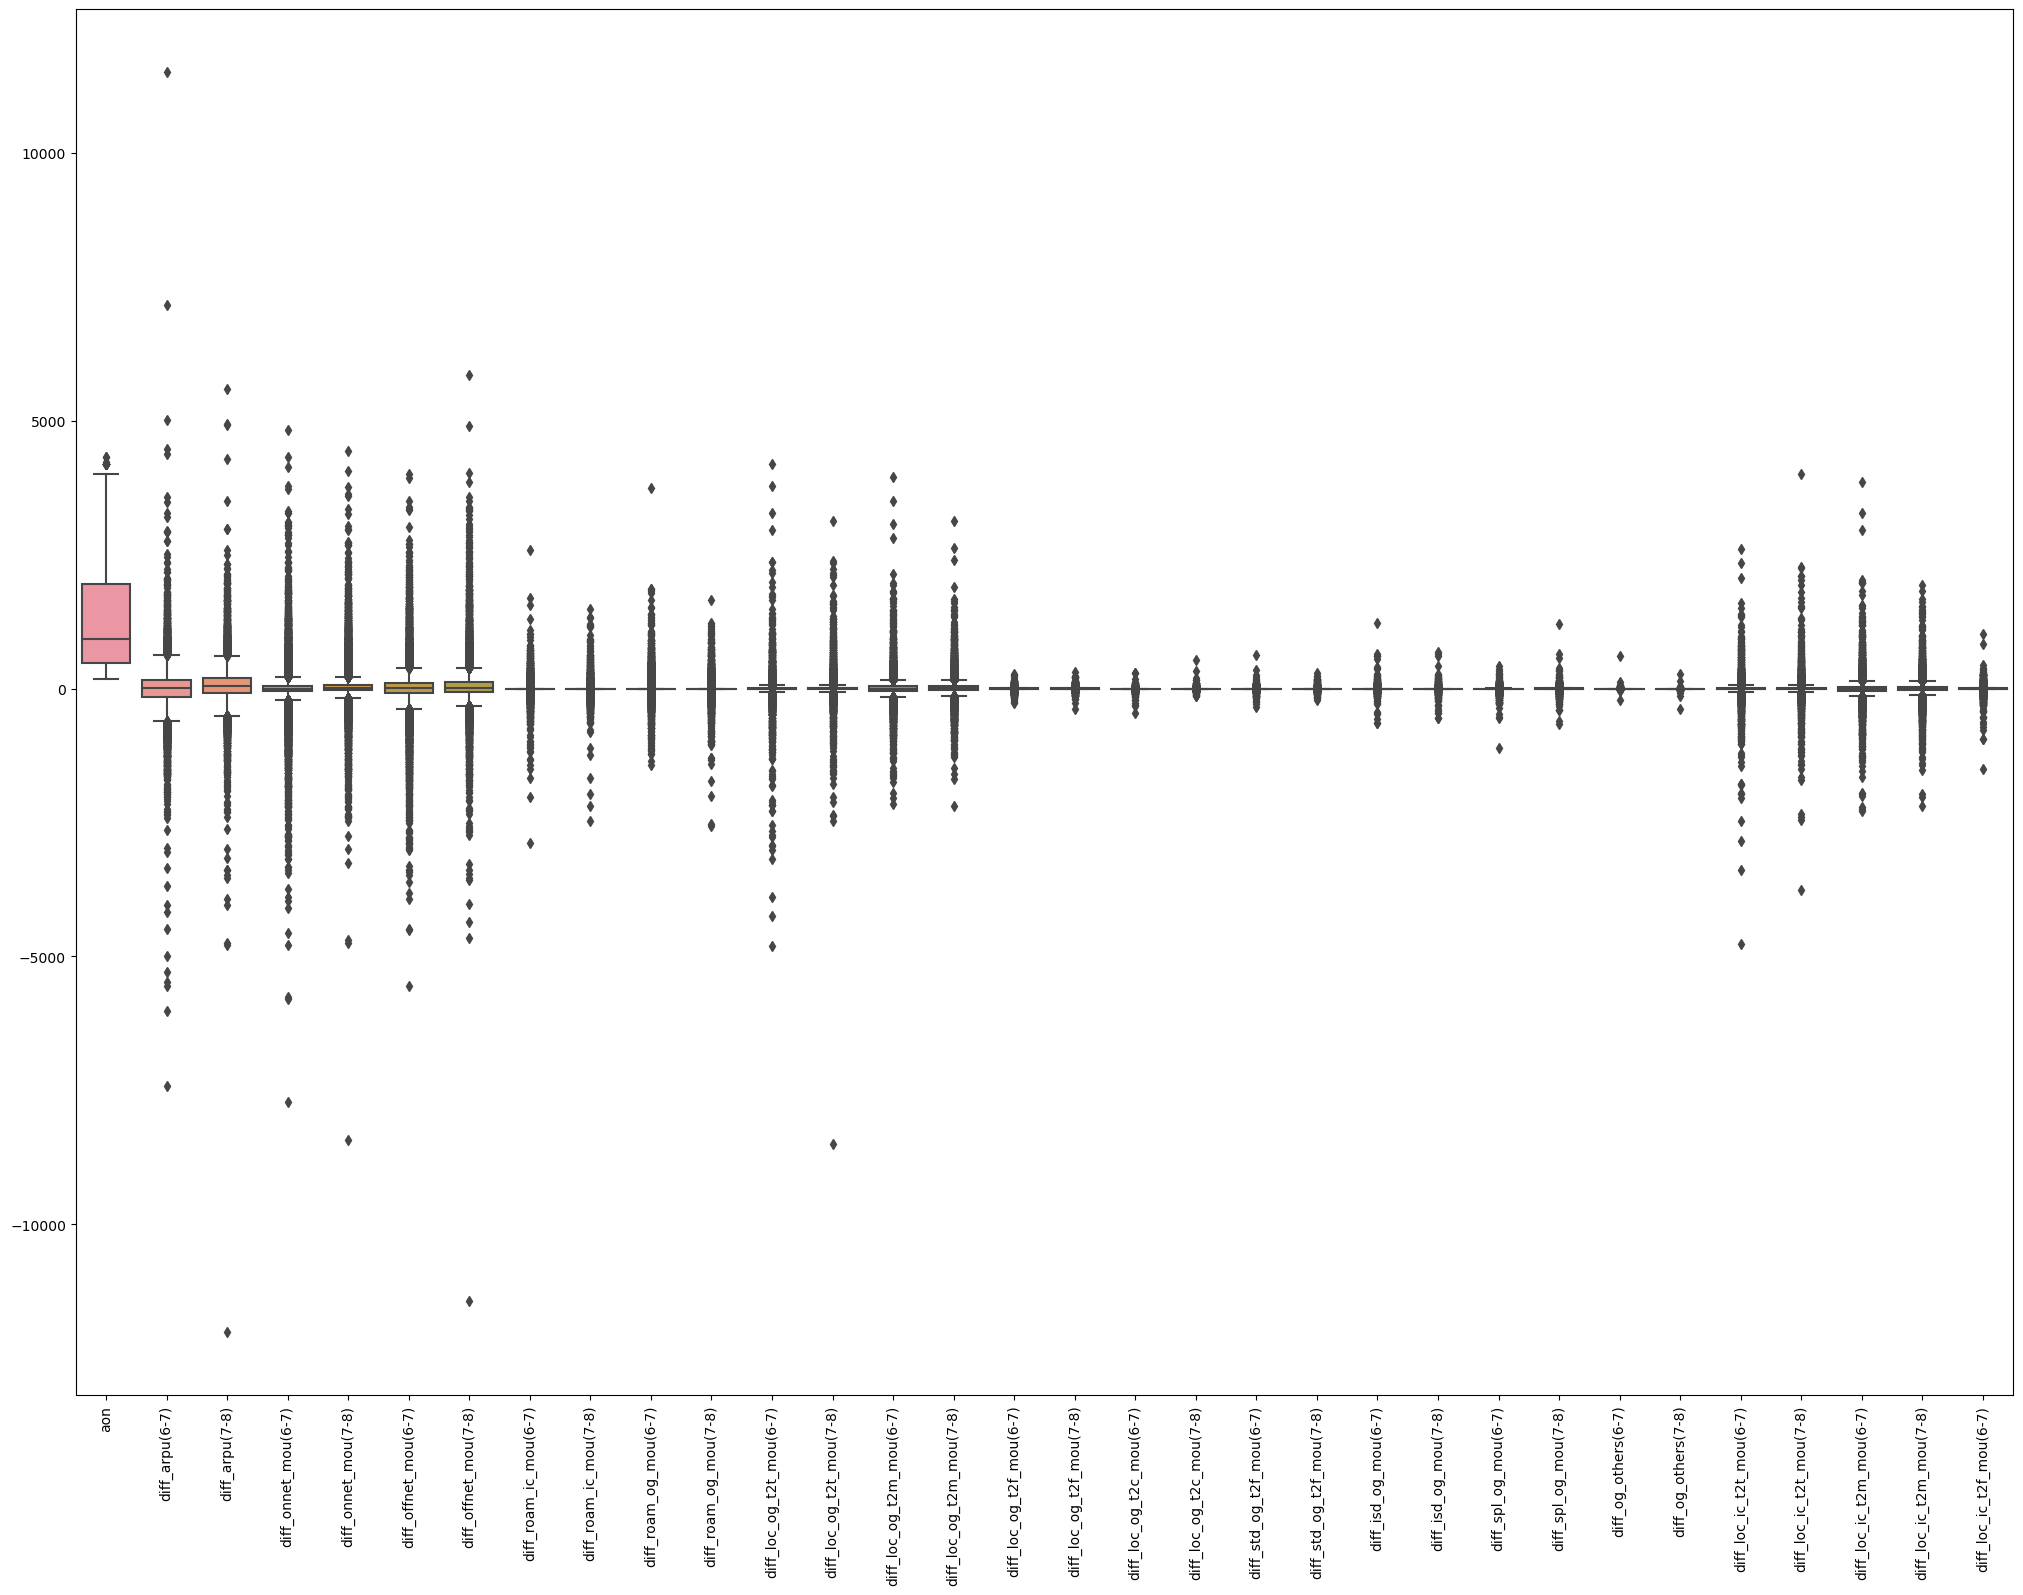

In [20]:
#Plotting of box-plots for first 32 variables of the data-set to see the outliers
plt.figure(figsize=(25,18))
plt.xticks(rotation=90)
sns.boxplot(data = df_diff.iloc[:,:32])
plt.show()

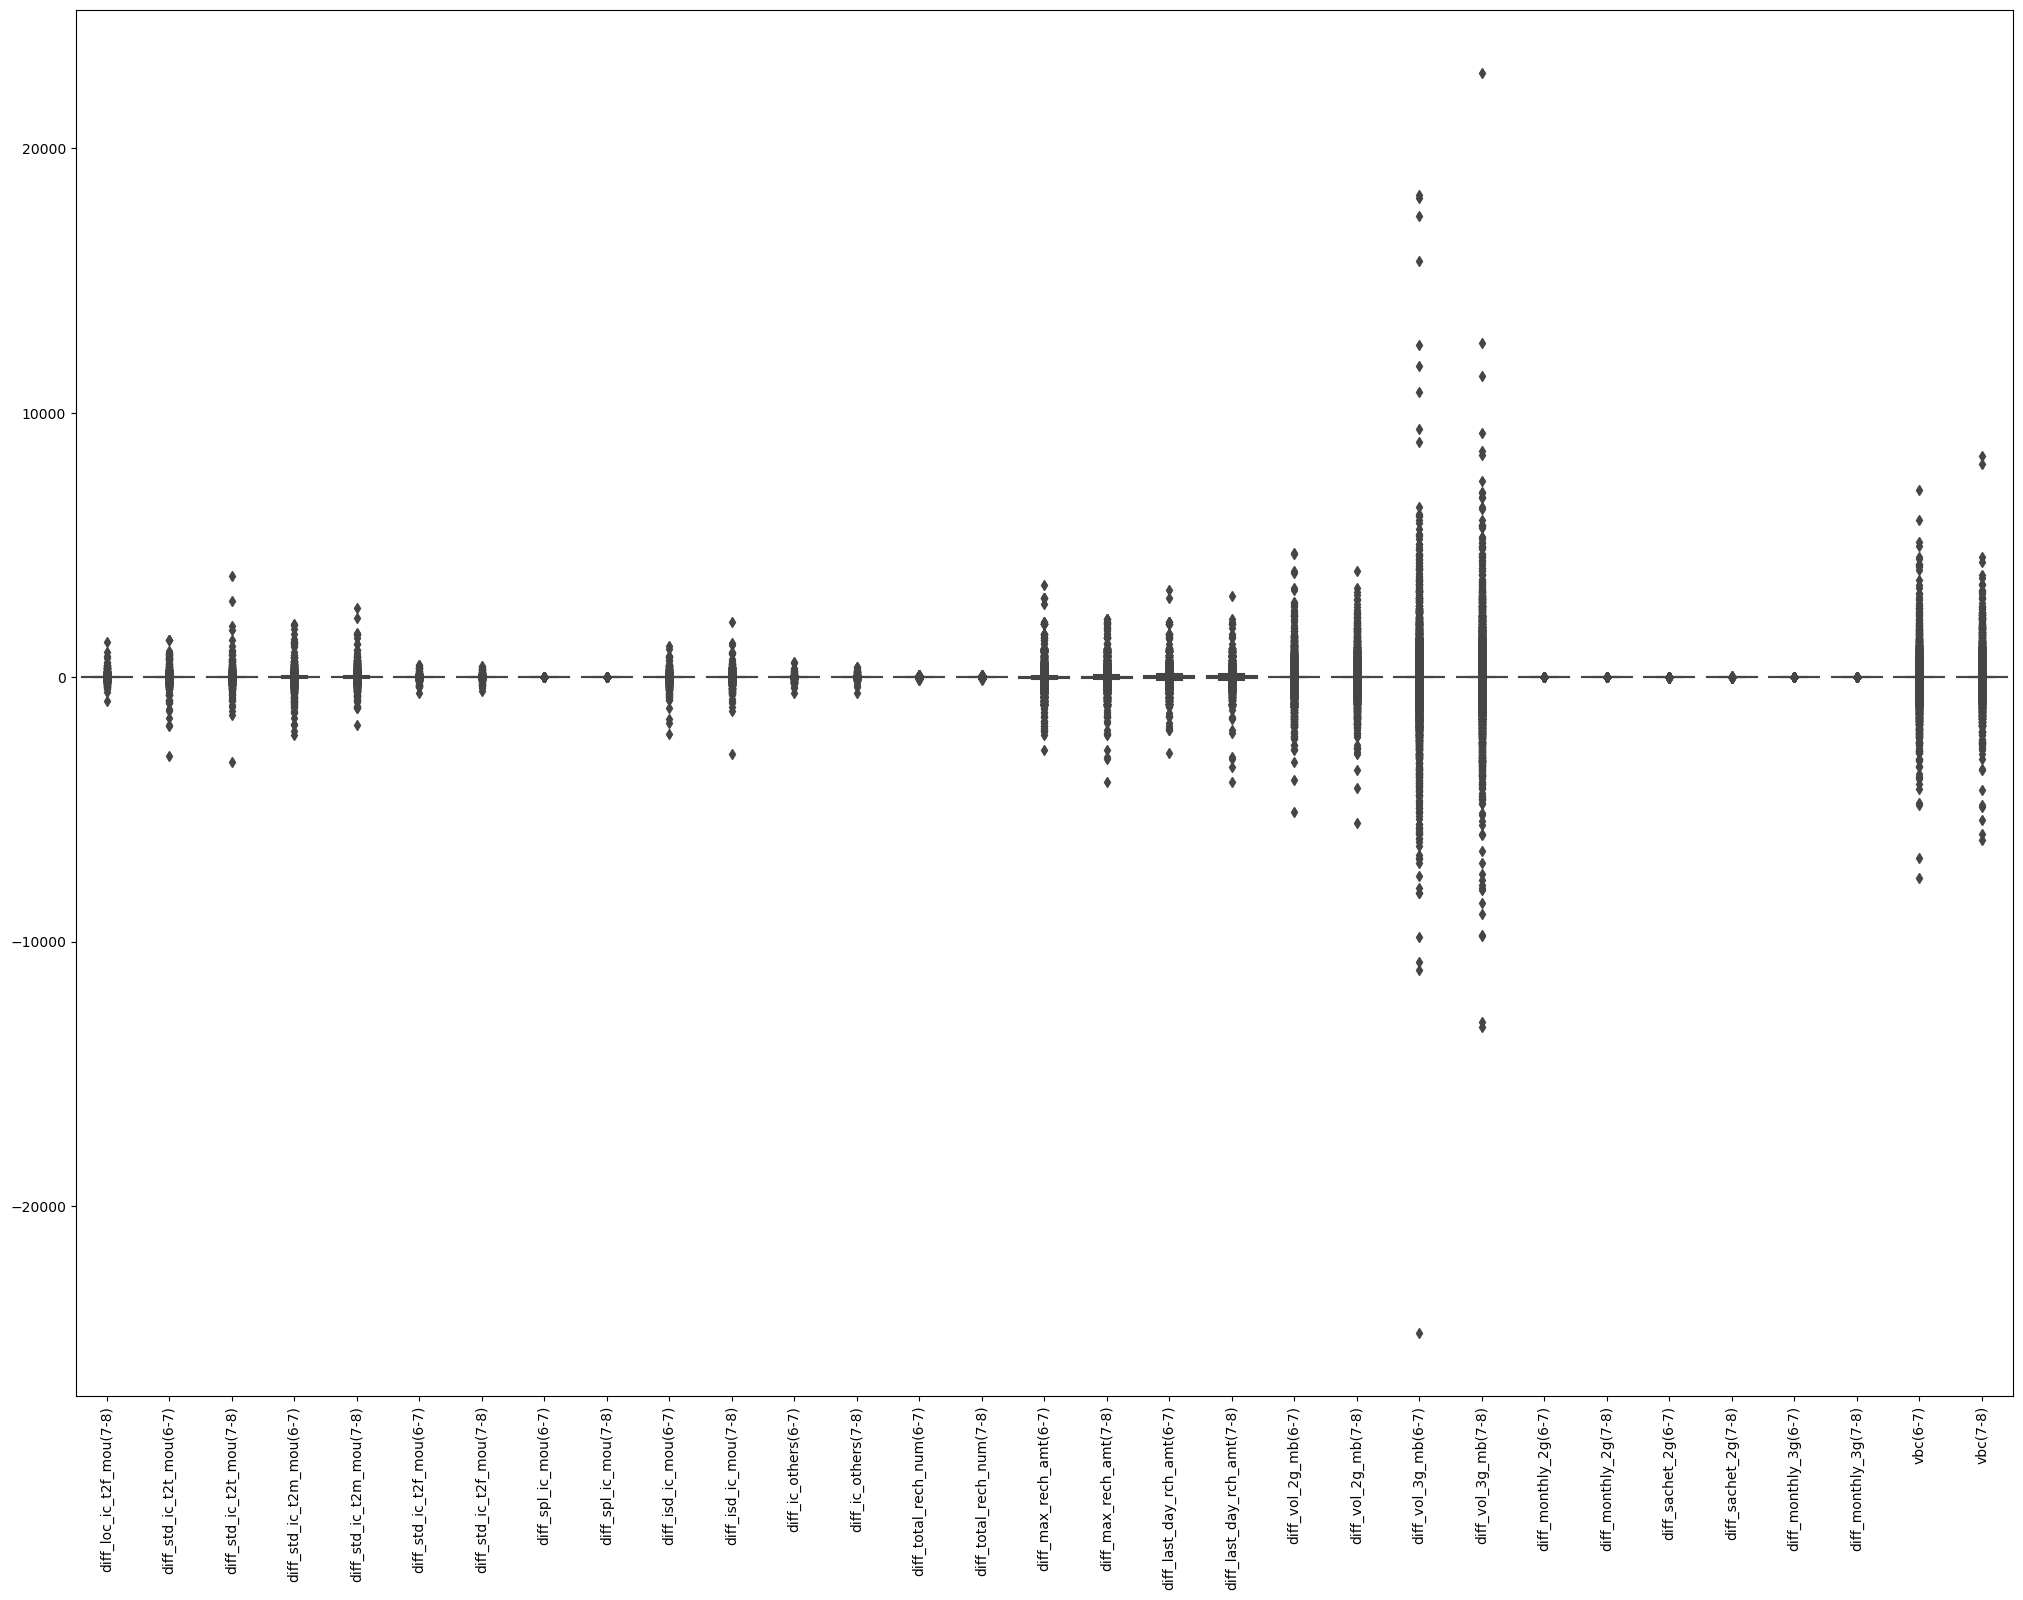

In [21]:
#Plotting of box-plots from 32-64 variables of the data-set to see the outliers
plt.figure(figsize=(25,18))
plt.xticks(rotation=90)
sns.boxplot(data = df_diff.iloc[:,32:64])
plt.show()

>From both the box-plots and histograms we can clearly see the presence of outliers, These outliers are to be treated to build a robust model

In [22]:
#Creating a function to cap the outliers using upper_limit : mean + 3*(S.D) and lower_limit : mean - 3*(S.D)
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

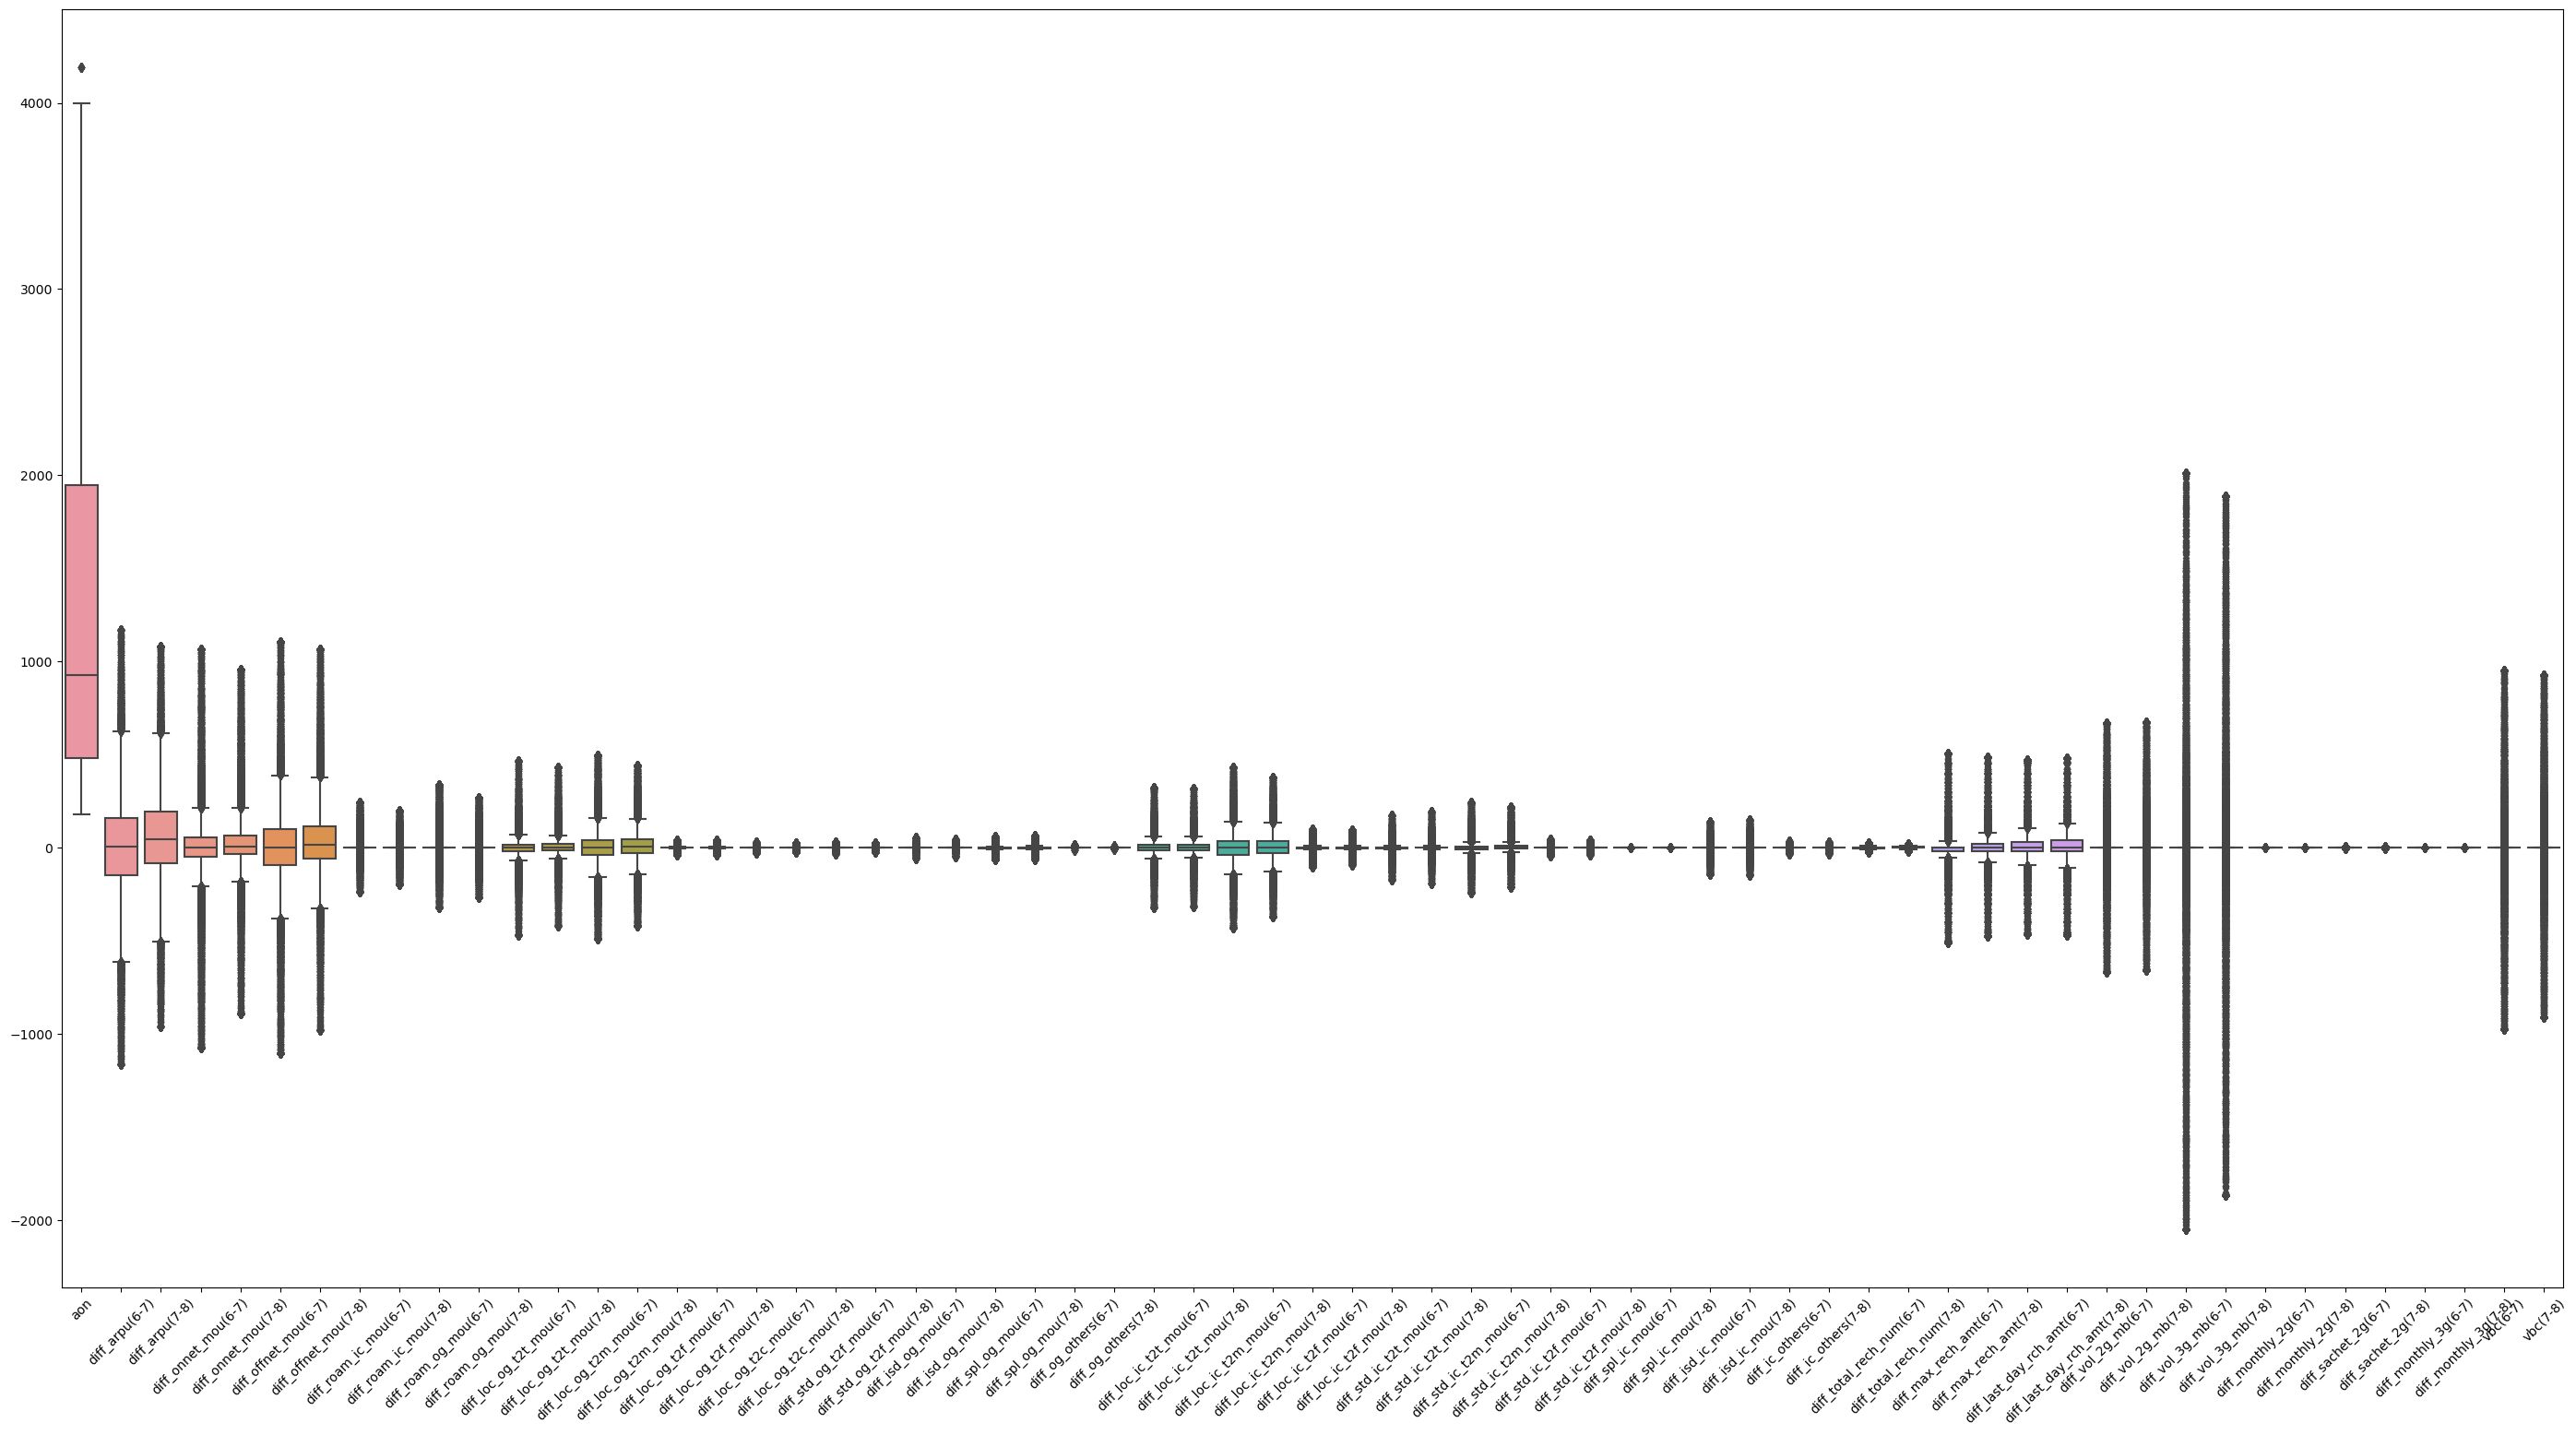

In [23]:
#Applying the cap_outliers function onto the dataframe df_diff
out_df= df_diff.apply(cap_outliers, axis=0)
#Plotting a box_plot of all the variables after applying capping
plt.figure(figsize=(35,18))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(out_df, columns=df_diff.columns))
plt.show()

>Outliers are treated in the dataset and it is now ready to be modelled

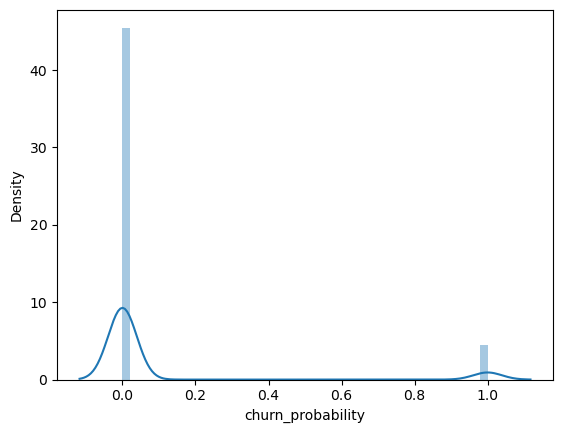

0    19106
1     1894
Name: churn_probability, dtype: int64


In [24]:
#Looking at the distribution of target variable
sns.distplot(target)
plt.show()
#Printing the value_counts in target variable
print(target.value_counts())

#### The target variable is highly imbalanced, hence we use resampling techniques such as smote to make the data_set balanced
Here we use and over_sampling method SMOTE (Synthetic Minority Oversampling Technique) provided by imlearn library, which balances the dataset by oversampling minority classes so that the data is balanced.

In [25]:
#Importing the SMOTE method from imblearn
from imblearn.over_sampling import SMOTE
#Resampling the data using SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(df_diff, target)
X.shape,y.shape

((38212, 63), (38212,))

### Scaling the data 

In [26]:
#scaling the data using standard_scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

# Modelling 
### Building classifier models on the data

#### The evaluation is done on ACCURACY, However the more important metric is RECALL since we are predicting the churn. So, we will look into building a model that has good Accuracy, Recall, F1_score

## Modelling with PCA
Since there are 60+ predictors, It is advisable to use PCA to build models as it reduces the dimensionality

In [27]:
#Instantiating the pca object with a ranom_state = 42
pca = PCA(random_state = 42)
#creating a new dataframe X_ which is a copy of X
X_ = X.copy()
#Fitting pca on X_ and checking the explained variance ratio
X_1 = pca.fit(X_)
pca.explained_variance_ratio_

array([0.08924172, 0.04962208, 0.04378588, 0.03651308, 0.03549782,
       0.02930084, 0.02876758, 0.02862364, 0.02583009, 0.02470171,
       0.02364381, 0.02313287, 0.02214472, 0.02161558, 0.02073749,
       0.02034785, 0.01988824, 0.01942621, 0.01871092, 0.01780424,
       0.01673819, 0.0165534 , 0.01628296, 0.01573494, 0.01516398,
       0.01502768, 0.01468775, 0.01363662, 0.01350576, 0.01307297,
       0.012862  , 0.01266033, 0.01213839, 0.011645  , 0.01124251,
       0.01105991, 0.01068278, 0.01020185, 0.00981686, 0.00977211,
       0.00965126, 0.00898894, 0.00884083, 0.0084712 , 0.00817898,
       0.00782575, 0.00752234, 0.00739904, 0.00715241, 0.00693576,
       0.00669079, 0.00632172, 0.00597875, 0.00566572, 0.00524279,
       0.00435168, 0.00412071, 0.0040324 , 0.00378932, 0.00351379,
       0.003173  , 0.00266999, 0.00166047])

### Scree Plot of PCA

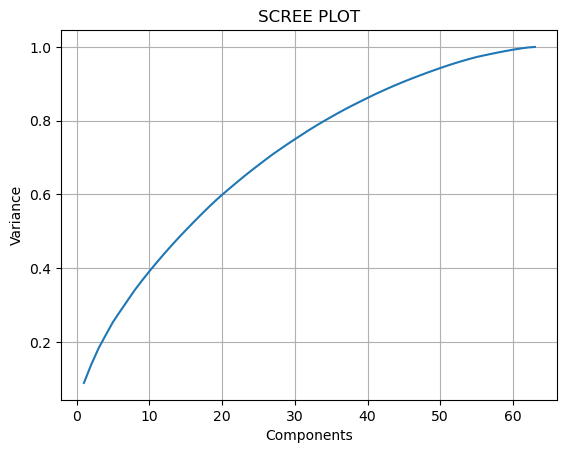

In [28]:
#Plotting the scree_plot of PCA to select the number of variables that can explain the data better
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.xlabel('Components')
plt.ylabel('Variance')
plt.title('SCREE PLOT')
plt.grid(True)
plt.show()

>Since we have already removed the variance in the data by calculating the differnce between the KPI and also removed the multicollinearity by removing the highly correlated variables, our PCA is able to explain the variance in the data as shown in the above graph

#### 90% of the variance in the data is explained by 45 variables after PCA, Hence taking the 45 varaibles


In [29]:
#Selecting top 45 features after performing PCA
pca_final = PCA(n_components=45,random_state=42)
pca_data =  pca_final.fit_transform(X_)
pca_data.shape

(38212, 45)

In [30]:
# Creating a new dataframe X_pca that has the PCA converted features
# Creating column names for the new X_pca dataframe
pca_df_cols =[]
for i in range(1,pca_data.shape[1]+1):
    pca_df_cols.append("Var_"+str(i))

# Creation of a new PCA dataframe that has columns as var1,var2,......var45    
X_pca = pd.DataFrame(pca_data, columns=pca_df_cols)
X_pca.head()

Var_1     Var_2     Var_3     Var_4     Var_5     Var_6     Var_7  \
0  0.725277 -0.627420  0.495620 -0.190475  0.059419  0.081178 -0.045993   
1  0.215151 -2.550951  1.109941 -0.694936 -0.223893  4.510299  3.344599   
2 -1.175528  0.734597 -3.288320 -2.123978  1.464011 -0.385218 -0.511153   
3  0.022700 -0.183189 -0.023575 -0.134098 -0.097398 -0.025799 -0.614989   
4  2.472458 -0.534955  2.426905 -0.983691 -0.313280 -0.386268  0.129012   

      Var_8     Var_9    Var_10    Var_11    Var_12    Var_13    Var_14  \
0  0.422534  0.288406 -0.110968 -0.258783 -0.214574  0.063818 -0.012195   
1  0.348946  1.006246  0.452708  0.958213  2.494103 -1.434841 -3.522060   
2  1.865073  0.710363 -0.790214 -0.191435  2.491758 -1.791989 -1.355654   
3 -0.090985  0.276827  0.666132  0.314607  0.264541 -0.764352 -0.061827   
4  0.448767 -1.022626  0.205937  0.032449 -1.288944 -0.157990  1.287862   

     Var_15    Var_16    Var_17    Var_18    Var_19    Var_20    Var_21  \
0 -0.093216  0.105352 -0.008164  0.010785  0.100143  0.404195  0.143228   
1  0.166181  0.779223 -0.944508 -0.388374  1.505465 -0.249783 -1.128619   
2  0.112575  0.802524 -0.619101 -2.025128 -0.261948 -2.062232 -2.482294   
3  0.004562  0.353897 -0.684637  0.126577 -0.341491 -0.145646 -0.400491   
4  0.897749  0.286307 -0.134706  0.951119 -0.281789  0.220311  0.191290   

     Var_22    Var_23    Var_24    Var_25    Var_26    Var_27    Var_28  \
0 -0.146900  0.363557  0.015045  0.095246 -0.366343  0.844126  0.875393   
1 -0.209687  0.100895 -0.666425  2.675203 -1.089977 -2.520415  0.236306   
2 -1.600046  2.586063 -2.972603 -1.328035  2.666535  1.588164  0.709772   
3 -0.147558 -0.028355 -0.229000  0.102796  0.015036  0.325123  0.433629   
4 -0.592254 -0.446754 -0.776885  0.019189 -0.356613  0.751036 -0.535517   

     Var_29    Var_30    Var_31    Var_32    Var_33    Var_34    Var_35  \
0  0.101944  0.211296  0.389168 -0.241787 -0.185548 -0.850254  0.264082   
1 -2.325876 -0.080600  0.477462  1.101259  1.051581 -3.320293 -0.793454   
2  2.219347  0.884613  0.184265 -0.217130  0.158119  0.125359 -0.407522   
3 -0.249306 -0.132983 -0.067862 -0.894269 -0.487892 -0.412201  0.351958   
4  0.140436 -0.352797 -0.536942  0.162738 -0.206719  0.222116  1.191271   

     Var_36    Var_37    Var_38    Var_39    Var_40    Var_41    Var_42  \
0  0.623488 -0.321342 -0.486598 -0.151478 -0.242956  0.054877 -0.579548   
1 -1.217647  1.072692  2.766944 -0.028615 -0.554041  1.513408  0.049952   
2  0.591721 -0.490687  0.865978 -0.739878  1.063563 -2.001625  1.274343   
3  0.507754 -0.604059 -1.121391 -0.030240  0.028056 -0.219623 -0.493062   
4 -0.819346  0.300514  0.144236  0.391697  0.104263 -0.211006 -0.211109   

     Var_43    Var_44    Var_45  
0  0.071300 -0.217077  0.212038  
1 -1.631601  0.701339 -0.888977  
2  4.428909  0.093892 -0.673841  
3  0.088840 -0.189914  0.003116  
4  0.709866  0.047795  0.336316

## 1. Logistic Regression with PCA

In [31]:
#creating a logistic regression object and predicting on X_pca
logreg_pca = LogisticRegression().fit(X_pca,y)
pred = logreg_pca.predict(X_pca)

In [32]:
#creating a function to print the classificaiton metrics
def metrics(classifier):
    print(confusion_matrix(y,pred))
    print(classification_report(y,pred))

[[15201  3905]
 [ 4195 14911]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     19106
           1       0.79      0.78      0.79     19106

    accuracy                           0.79     38212
   macro avg       0.79      0.79      0.79     38212
weighted avg       0.79      0.79      0.79     38212



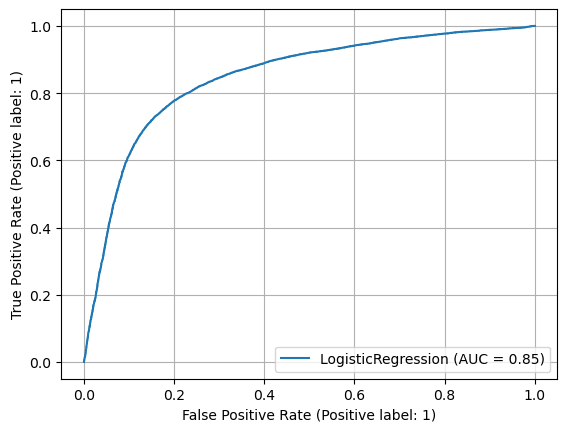

In [34]:
#printing the metrics and plotting ROC_AUC of logistic regression using PCA
metrics(logreg_pca)
#plot_roc_curve(logreg_pca,X_pca,y)
RocCurveDisplay.from_estimator(logreg_pca,X_pca,y)
plt.grid(True)
plt.show()

In [35]:
#Let us do cross validation and check the mean score using the cross_val_score method

#Instantiating a StratifiedKFold with n_splits = 2
skf = StratifiedKFold(n_splits=2)

#Printing the cross validation score 
cv_score = cross_val_score(logreg_pca,X,y,cv=skf,scoring='accuracy')
print(cv_score.mean())

0.7979430545378414


> Cross_validated Accuracy of 0.79 and an f1_score of 0.79 on PCA data in logistic regression. Logistic Regression does not perform well because there is no linear relationship between the data. We have already transformed the data during feature engineering so as to reduce dimensionality and remove multicollinearity. Hence we move ahead with building without PCA

## Modelling without PCA

## 1.Logistic Regression

[[15518  3588]
 [ 4002 15104]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     19106
           1       0.81      0.79      0.80     19106

    accuracy                           0.80     38212
   macro avg       0.80      0.80      0.80     38212
weighted avg       0.80      0.80      0.80     38212



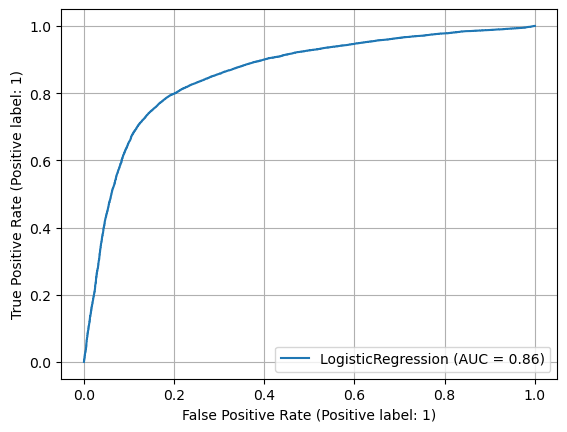

In [36]:
#fitting a logistic regression on X,y and printing the metrics and ROC_AUC curve
logreg = LogisticRegression().fit(X,y)
pred = logreg.predict(X)
metrics(logreg)
RocCurveDisplay.from_estimator(logreg,X,y)
plt.grid(True)
plt.show()

In [37]:
#Printing the cross validation score 
cv_score = cross_val_score(logreg,X,y,cv=skf,scoring='accuracy')
print(cv_score.mean())

0.7979430545378414


> Our model without pca has slightly better scores in terms of recall and aoc_curve since there are 15 variables present in this model that are unavailable in PCA

#### Since our model is performing poorly on Logistic regression, we build ensemble models for higher predictive power

### 2.Random_forest

[[17632  1474]
 [ 1292 17814]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     19106
           1       0.92      0.93      0.93     19106

    accuracy                           0.93     38212
   macro avg       0.93      0.93      0.93     38212
weighted avg       0.93      0.93      0.93     38212



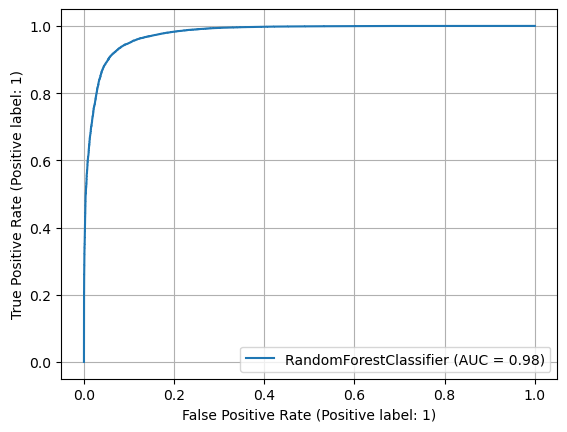

In [38]:
#using a random forest classifier to build the model
rf = RandomForestClassifier(max_depth=15, 
                            max_features=5, 
                            min_samples_leaf=50,
                            min_samples_split=100, 
                            random_state=42).fit(X,y)
pred = rf.predict(X)
metrics(rf)
RocCurveDisplay.from_estimator(rf,X,y)
plt.grid(True)
plt.show()

In [39]:
#Printing the cross validation score 
cv_score = cross_val_score(rf,X,y,cv=skf,scoring='accuracy')
print(cv_score.mean())

0.9092431696849157


> Random Forest gives a fairly better cross_validated accuracy score of 90.9% with AUC=0.98 Recall=0.93 and f1-score=0.93

### Feature Importance in Random Forest
Checking the importance of each feature as decided by the Random forest algorithm

In [40]:
#Sorting all the features according to their order
model = rf
sorted_idx = np.argsort(model.feature_importances_)[::-1]
for index in sorted_idx:
    print([X.columns[index], model.feature_importances_[index]])

['diff_roam_ic_mou(7-8)', 0.15557697079087993]
['diff_roam_og_mou(7-8)', 0.12723316921589503]
['diff_og_others(7-8)', 0.06182335726995354]
['diff_arpu(7-8)', 0.06111752121197747]
['diff_max_rech_amt(7-8)', 0.05830248376809986]
['diff_roam_og_mou(6-7)', 0.0479216918095465]
['diff_total_rech_num(7-8)', 0.04141250454554652]
['diff_last_day_rch_amt(7-8)', 0.03969657271759173]
['diff_spl_ic_mou(7-8)', 0.02990781671597139]
['diff_roam_ic_mou(6-7)', 0.025565355724059068]
['diff_loc_ic_t2m_mou(7-8)', 0.021473990990414263]
['diff_isd_og_mou(7-8)', 0.021425240494708175]
['diff_onnet_mou(7-8)', 0.01795385279130312]
['diff_offnet_mou(7-8)', 0.017611982185865974]
['diff_std_ic_t2t_mou(7-8)', 0.01615490585373426]
['diff_og_others(6-7)', 0.014981441471756191]
['diff_arpu(6-7)', 0.014000209408549872]
['diff_loc_ic_t2t_mou(7-8)', 0.01388088806771815]
['diff_loc_og_t2t_mou(7-8)', 0.013672560155138548]
['diff_std_ic_t2m_mou(7-8)', 0.012460459790240505]
['diff_last_day_rch_amt(6-7)', 0.011424501742879676]

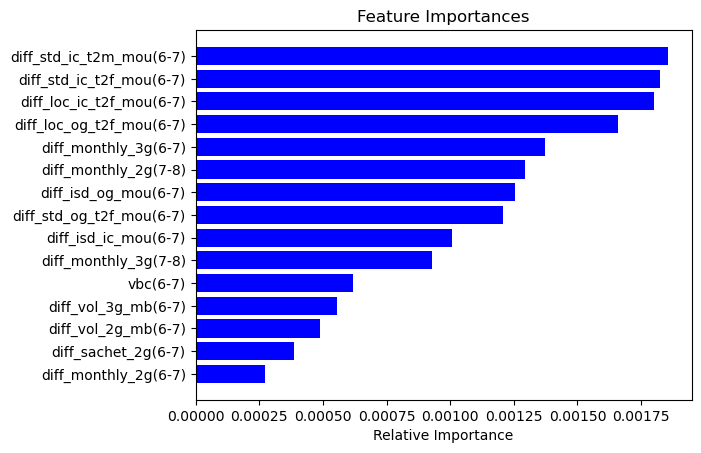

In [41]:
# Plotting the relative feature importance vs the top 15 important variables
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[:15]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## AdaBoost
#### 1. To proceed onto AdaBoost, firstly we create a shallow decision tree with depth of 2 (Decision Stump) which is a weak learner

In [42]:
# Create a shallow tree as weak learner which is a decision tree of depth 2(Decision stump)
shallow_tree = DecisionTreeClassifier(max_depth=2, 
                                      random_state=42).fit(X,y)

y_pred = shallow_tree.predict(X)
score = accuracy_score(y, y_pred)
score

0.8305767821626714

> For a decision stump we got an accuracy of 83%, Since it is a weak learner, the accuracy is low.

#### 2. Building an AdaBoost Classifier on top of our DecisionStump 

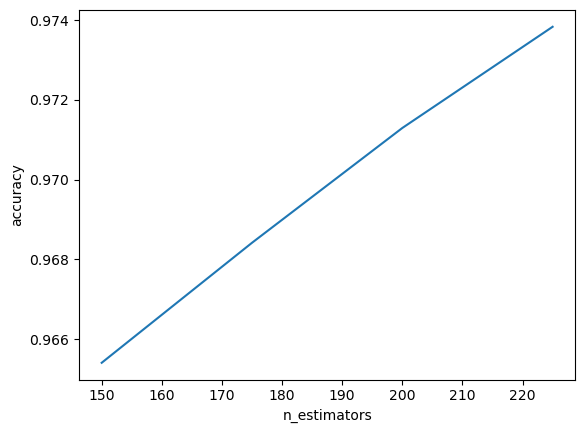

In [43]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used as estimators
estimators = list(range(150, 250, 25))

# Loop through the estimators
adaboost_scores = []
for i in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree,
                                  n_estimators = i, 
                                  random_state=42)
    
    adaboost.fit(X, y)
    pred = adaboost.predict(X)
    score = accuracy_score(y,pred)
    adaboost_scores.append(score)
    
# Plot the scores corresponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()    

> In the above plot we can see that for 190 estimators we are getting around 0.97 accuracy, In order to avoid overfitting, we go ahead with 190 estimators

[[18636   470]
 [  627 18479]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     19106
           1       0.98      0.97      0.97     19106

    accuracy                           0.97     38212
   macro avg       0.97      0.97      0.97     38212
weighted avg       0.97      0.97      0.97     38212



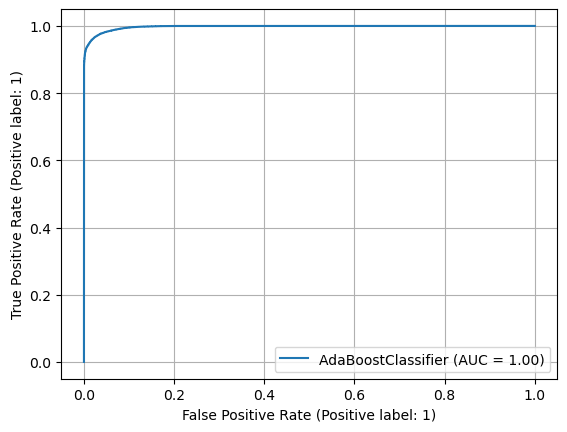

In [44]:
#Building an AdaBoost classifier with 190 estimators and checking the metrics
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree,
                                   n_estimators = 200, 
                                   random_state=42).fit(X,y)
pred = adaboost_best.predict(X)
metrics(pred)
RocCurveDisplay.from_estimator(adaboost_best,X,y)
plt.grid(True)
plt.show()

> Accuracy of 97%, Recall and F1-Score of 97% and an AUC of 100%. Adaboost performance is the best so far. Let us see the cross_validation score 

In [45]:
#Printing the cross validation score 
cv_score = cross_val_score(adaboost_best,X,y,cv=skf,scoring='accuracy')
print(cv_score.mean())

0.9375065424473987


> Though the training scores are excellent, the cross validation scores are only 93%

## XGBoost
#### XGBoostClassifier has some important parameters 'max_depth','min_child_weight' which are to be tuned using GridSearchCV

In [46]:
#performing hyperparemeter tuning of max_depth and min_child_weight on Xgboost
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

xgb_clf =  XGBClassifier( learning_rate =0.05,
                         n_estimators=300,
                         gamma=0, 
                         subsample=0.5, 
                         colsample_bytree=0.3,
                         colsample_bylevel = 0.3,
                         objective= 'binary:logistic', 
                         nthread=4, scale_pos_weight=1, seed=27)
                         
xgb_cv = GridSearchCV(estimator = xgb_clf, param_grid = param_test1, scoring='f1',n_jobs=-1, cv=5)

In [47]:
#fitting XGBoost on the GridSearchCV and printing the best parameters
xgb_cv.fit(X, y)
xgb_cv.best_params_

{'max_depth': 9, 'min_child_weight': 1}

[[18862   244]
 [  211 18895]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19106
           1       0.99      0.99      0.99     19106

    accuracy                           0.99     38212
   macro avg       0.99      0.99      0.99     38212
weighted avg       0.99      0.99      0.99     38212



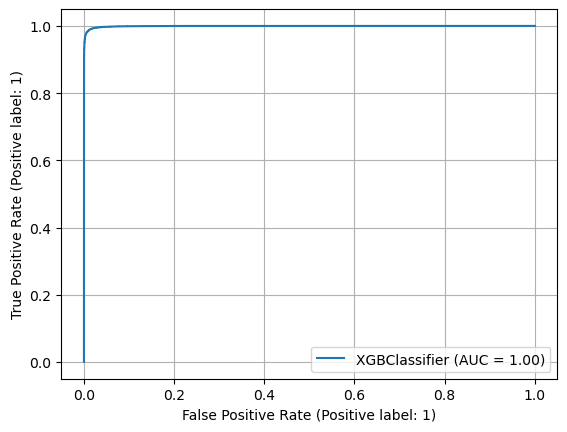

In [48]:
#using the best XGBoost classifier after hyper_parameter tuning to build the model

xgb = xgb_cv.best_estimator_
pred = xgb.predict(X)
metrics(xgb)
RocCurveDisplay.from_estimator(xgb,X,y)
plt.grid(True)
plt.show()

> The Accuracy, Precision,Recall,F1_score all are 99% and the AUC is 100%. Looks like the model has overfit on the data, Let us check the scores after cross validation

In [49]:
#Printing the cross validation score 
cv_score = cross_val_score(xgb,X,y,cv=skf,scoring='accuracy')
print(cv_score.mean())

0.9559562441117974


> The cross_validation score of accuracy is 95.5%. The XGBoost classifier is able to generalize the data better and so far the best among all the models we built, So we will use XGBoost for predicting our test data

## Feature Importance in XGBoost
Checking the importance of each feature as decided by the Random forest algorithm

In [50]:
#Sorting all the features according to their order
model = xgb
sorted_idx = np.argsort(model.feature_importances_)[::-1]
for index in sorted_idx:
    print([X.columns[index], model.feature_importances_[index]])   

['diff_og_others(7-8)', 0.113837816]
['diff_roam_ic_mou(7-8)', 0.06842349]
['diff_spl_ic_mou(7-8)', 0.047698725]
['diff_roam_og_mou(7-8)', 0.04518992]
['diff_max_rech_amt(7-8)', 0.034746766]
['diff_isd_og_mou(7-8)', 0.034202356]
['diff_roam_og_mou(6-7)', 0.025594264]
['diff_total_rech_num(7-8)', 0.024060039]
['diff_last_day_rch_amt(7-8)', 0.02180438]
['diff_isd_ic_mou(7-8)', 0.021686161]
['diff_arpu(7-8)', 0.020825176]
['diff_roam_ic_mou(6-7)', 0.020328082]
['diff_og_others(6-7)', 0.020098813]
['diff_monthly_2g(7-8)', 0.019818492]
['diff_spl_ic_mou(6-7)', 0.019396553]
['diff_sachet_2g(7-8)', 0.018186178]
['diff_loc_og_t2c_mou(7-8)', 0.017826134]
['diff_monthly_3g(6-7)', 0.017472794]
['diff_std_ic_t2t_mou(7-8)', 0.01595705]
['diff_vol_3g_mb(7-8)', 0.015212951]
['diff_monthly_2g(6-7)', 0.015071177]
['diff_std_og_t2f_mou(7-8)', 0.014537432]
['diff_loc_ic_t2m_mou(7-8)', 0.014494078]
['diff_max_rech_amt(6-7)', 0.013976038]
['diff_loc_ic_t2t_mou(7-8)', 0.013008646]
['diff_loc_og_t2t_mou(7-8)

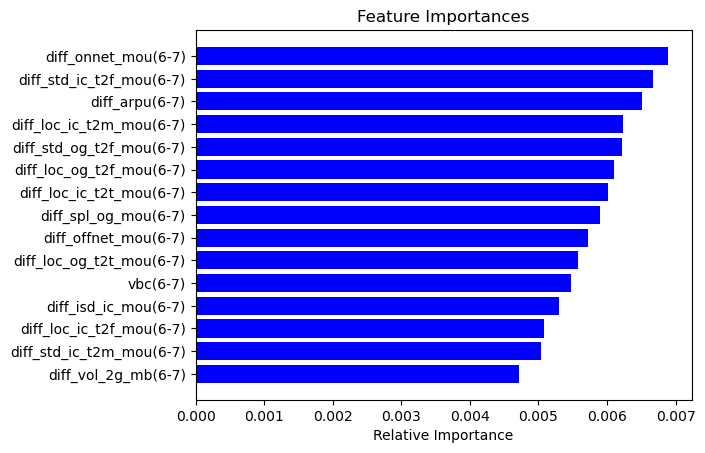

In [51]:
# Plotting the relative feature importance vs the top 15 important variables
features = X.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)[:15]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Preparing the Test-Data
Applying all the transformation steps that were applied on the train_dataset to make predictions on the test_data

In [52]:
#creating a new dataframe df_test that is a copy of test_data for ease in modelling process
df_test = test_data.copy()

#printing the shape of df_test
print('The shape of the dataset before cleaning   ',df_test.shape)

# Filtering the columns with missing values > 50% and dropping those variables
missing_test = 100*df_test.isna().mean()
missing_test = missing_test[missing_test>50]

df_test = df_test.drop(missing_test.index,axis=1)

#dropping all the columns that have only one variable, Hence no variance
no_variance_test = [col for col in df_test.columns if df_test[col].nunique() == 1]
df_test = df_test.drop(no_variance_test,axis=1)

#looking for object data types in the data 
object_dtype_test = df_test.select_dtypes(include='object')

#These columns just provide the date of last recharge,hence dropped
df_test = df_test.drop(object_dtype_test,axis=1)

# Id column is not useful for model
df2_test = df_test.drop('id',axis=1)

# Imputing the null values in the data using the mean
for col in df2_test.columns:
    df2_test[col] = df2_test[col].fillna(df2_test[col].mean())
#All the null values in the data are imputed by the mean in their respective features. 

#In this step we create a new data_frame based upon the KPI of 6,7,8 variables and store the difference values just as train set

#Creating the lists of KPI for respecive months so that their difference can be calculated
kpi_6_test = [ col for col in df2_test.columns if '6' in col]
kpi_7_test = [ col for col in df2_test.columns if '7' in col]
kpi_8_test = [ col for col in df2_test.columns if '8' in col]

#A new dataframe df_kpi is created that store the difference values of KPI(6-7) and KPI(7-8)
df_kpi_test = pd.DataFrame()
for i in range(0,len(kpi_6)-1):
    df_kpi_test["diff_"+kpi_6_test[i][:-2]+"(6-7)"] = df2_test[kpi_6_test[i]] - df2_test[kpi_7_test[i]] 
    df_kpi_test["diff_"+kpi_6_test[i][:-2]+"(7-8)"] = df2_test[kpi_7_test[i]] - df2_test[kpi_8_test[i]]

#Entering the differnce of vbc variable for 6,7,8 months    
df_kpi_test["vbc(6-7)"] = df2_test['jun_vbc_3g'] - df2_test['jul_vbc_3g']
df_kpi_test["vbc(7-8)"] = df2_test['jul_vbc_3g'] - df2_test['aug_vbc_3g']

#vbc_list that contains all the vbc_6,7,8 features
vbc_list_test = ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']

#drop_var that contains the variables to drop
drop_var_test = kpi_6_test+kpi_7_test+kpi_8_test+vbc_list_test

#dropping the variables from the df2 dataframe and store into df3
df3_test = df2_test.drop(drop_var_test,axis=1)    

#create a new dataframe by concatenating the df_kpi and the df3
df_diff_test = pd.concat([df3_test,df_kpi_test],axis=1)

#redundant vars are those whose data is explained by other sub_variables
redundant_vars_test = ['diff_loc_og_mou(6-7)','diff_loc_og_mou(7-8)','diff_std_og_t2t_mou(6-7)','diff_std_og_t2t_mou(7-8)',
                  'diff_std_og_t2m_mou(6-7)','diff_std_og_t2m_mou(7-8)','diff_std_og_mou(6-7)','diff_std_og_mou(7-8)',
                  'diff_total_og_mou(6-7)','diff_total_og_mou(7-8)','diff_loc_ic_mou(6-7)','diff_loc_ic_mou(7-8)',
                  'diff_std_ic_mou(6-7)','diff_std_ic_mou(7-8)','diff_total_ic_mou(6-7)','diff_total_ic_mou(7-8)',
                  'diff_total_rech_amt(6-7)','diff_total_rech_amt(7-8)']

# Droping the redundant_vars from the dataset and printing the shape
df_diff_test = df_diff_test.drop(redundant_vars_test,axis=1)
print("New shape after dropping the redundant_vars",df_diff_test.shape)

# Creating a new dataframe X_test which is a copy of df_diff_test
X_test = df_diff_test.copy()
#Transforming the X_test data by using the scaler.transform
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

The shape of the dataset before cleaning    (30000, 171)
New shape after dropping the redundant_vars (30000, 63)


## Making predictions on test data using XGBoost

In [55]:
# Making the predicitons on test data using xgb
y_test_pred = xgb.predict(X_test)
# Creating a new dataframe to store the output

output = pd.DataFrame({"id":test_data['id'],"churn_probability":y_test_pred})
# Storing the output to submission,csv file

output.to_csv('submission.csv', index=False)
print("File has been submitted successfully")

File has been submitted successfully


In [56]:
# Checking the predictions values in the test dataset
output['churn_probability'].value_counts()

0    26901
1     3099
Name: churn_probability, dtype: int64

#### Predictions Summary of test data
- Not Churn : 89.67
- Churn     : 10.33

#### EDA
- There were lot of missing values in the data which were mean imputed and many features had greater than 50% missing values. that were dropped.
- The data had high dimensionality and multi-collinearity because of periodic data collection of 6,7,8 months.
- Performed Feature Engineering by calculating the differences between the 6,7 months and 7,8 months.
- This technique had reduced the multi-collinearity and dimensionality without the loss of information.

#### Model Building
- Logistic Regression + PCA   ::: Accuracy = 0.79, Recall = 0.79, CV-Score = 0.79
- Logistic Regression         ::: Accuracy = 0.80, Recall = 0.80, CV-Score = 0.79
- Random Forest               ::: Accuracy = 0.93, Recall = 0.93, CV-Score = 0.90
- AdaBoost                    ::: Accuracy = 0.97, Recall = 0.97, CV-Score = 0.93
- XGBoost                     ::: Accuracy = 0.99, Recall = 0.99, CV-Score = 0.95

#### Due to higher accuracy and high recall which are our main parameters to identify the churn, chosen XGBoost as the final model.

#### Feature Importance
- Feature importance of both random forest and XGBoost are printed in the analysis, However as XGBoost is chosen as final model, the features of XGBoost are mentioned.
- Since the feature engineering had combined 2 original features to create a new feature, For every feature in transformed dataest is equal to the two original features from which it was created

#### XGBoost Important Features
- diff_loc_ic_t2f_mou(7-8)
- diff_loc_ic_t2m_mou(6-7)
- aon
- diff_isd_ic_mou(6-7)
- diff_loc_og_t2m_mou(6-7)
- diff_loc_ic_t2t_mou(6-7)
- diff_std_ic_t2t_mou(6-7)
- diff_onnet_mou(6-7)
- diff_std_ic_t2f_mou(6-7)
- diff_loc_ic_t2f_mou(6-7)
- diff_offnet_mou(6-7)
- diff_std_ic_t2m_mou(6-7)
- diff_loc_og_t2f_mou(6-7)
- diff_vol_2g_mb(6-7)
- diff_spl_og_mou(6-7)

#### The business should keep an eye on the above said meta-variables and their parent-variables in respective months to identify probable churn customers.